In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Explaratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.loc[:,"bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

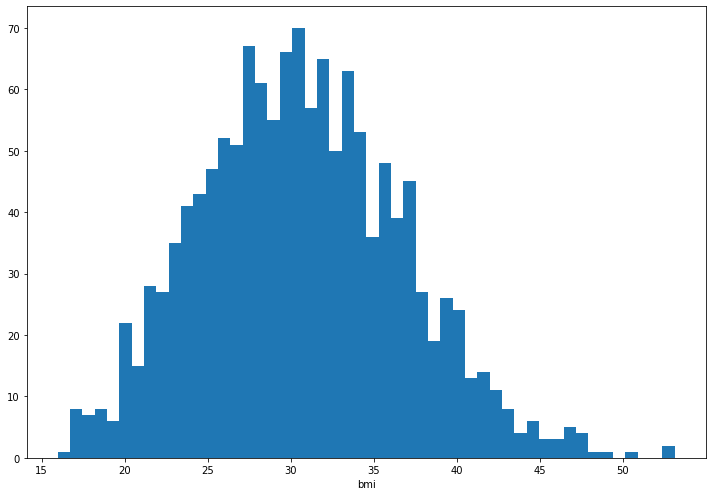

In [ ]:
# Creating histogram for bmi

fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(data.loc[:,"bmi"], bins = 50 )
plt.xlabel("bmi") 
# Show plot
plt.show()

# As we can see below the range between 25 and 35 has the most of the population
# We can see that there are outliers in bmi above 50

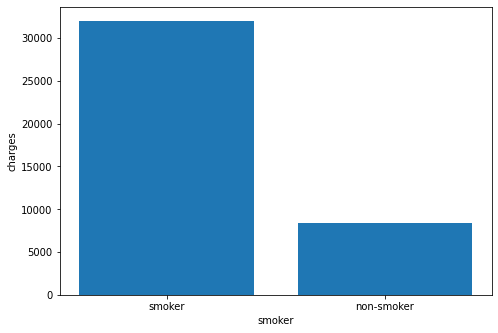

In [ ]:
#Analysis of the relationship between "smoker" and "charges", the chart shows the difference between the average charge of smokers and non_smokers
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
smokers = (data[data['smoker'] == 'yes'])['charges'].mean()
non_smokers = (data[data['smoker'] == 'no'])['charges'].mean()
ax.bar(['smoker', 'non-smoker'],[smokers, non_smokers])
plt.xlabel("smoker") 
plt.ylabel("charges")
plt.show()

# As the bar chart shows smoking cigarette drastically affects the charge

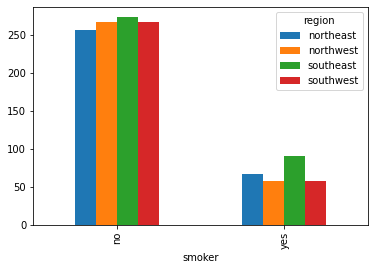

In [ ]:
#Analysis of the relationship between "smoker" and "region"
#Crosstab method is used to compute a simple cross-tabulation of two (or more) factors
Tab=pd.crosstab(index=data['smoker'],columns=data['region'])
Tab.plot.bar()

# As you can see from the bar chart people who lives in the southeast area of the country has the most population both for smokers and nonsmokers

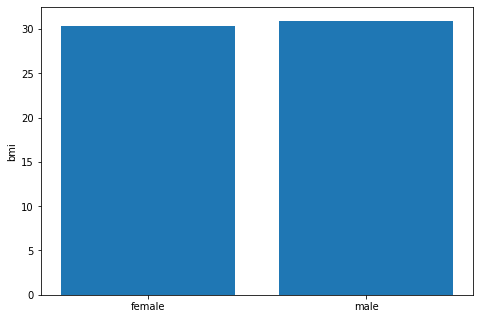

In [ ]:
#Analysis of the relationship between "sex" and "bmi", the chart shows the difference between the average bmi of males and females
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
females = (data[data['sex'] == 'female'])['bmi'].mean()
males = (data[data['sex'] == 'male'])['bmi'].mean()
ax.bar(['female', 'male'],[females, males])
plt.ylabel("bmi")
plt.show()

# As the bar chart shows that there is small difference between male and female candidates in bmi

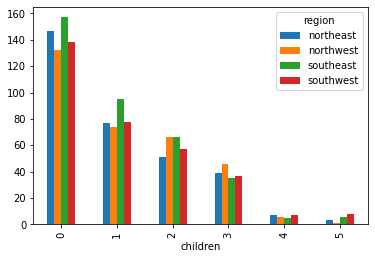

In [ ]:
# Analysis of the relationship between number of "children" and "region"

Tab=pd.crosstab(index=data['children'],columns=data['region'])
Tab.plot.bar()
# In all of the regions most of the customers have no children. 

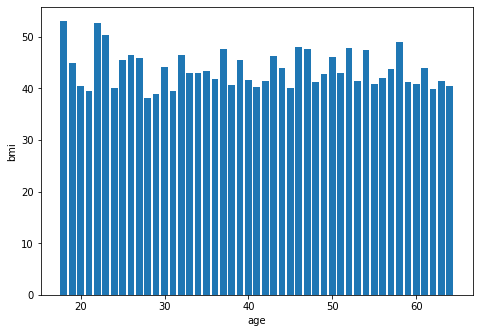

In [ ]:
# Analysis of the relationship between "age" and "bmi"
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(data.loc[:,"age"],data.loc[:,"bmi"])
plt.xlabel("age") 
plt.ylabel("bmi")
plt.show()

# We can see that there is no big difference in bmi related to age

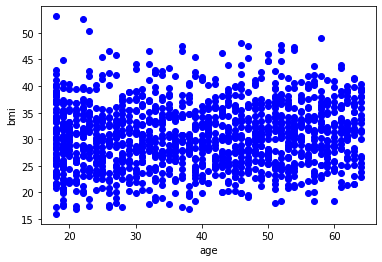

In [ ]:
plt.scatter(data.loc[:,"age"], data.loc[:,"bmi"], c ="blue")
plt.xlabel("age") 
plt.ylabel("bmi") 
# To show the plot
plt.show()
# We can see the outliers clearly

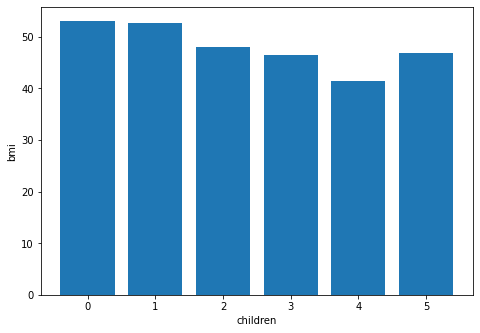

In [ ]:
# Analysis of the relationship between "bmi" and "children"
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(data.loc[:,"children"],data.loc[:,"bmi"])
plt.xlabel("children") 
plt.ylabel("bmi")
plt.show()

# We see that people who have the least amount of children has a greater bmi than the rest and people with 4 children have the lowest bmi. 

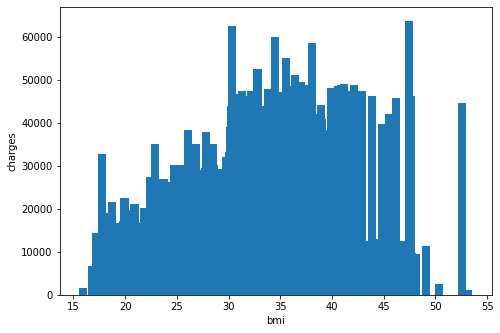

In [ ]:
# Analysis of the relationship between "bmi" and "charges"
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(data.loc[:,"bmi"],data.loc[:,"charges"])
plt.xlabel("bmi") 
plt.ylabel("charges")
plt.show()

# As we can see from the bar chart between 15 and 35 there is almost a linear relation in data, above 35 we can't see a relation between charges and bmi

In [ ]:
# Analysis of the relationship between "region", "smoker" and "bmi"
# divide data into regions
nwest = data[data["region"] == "northwest"]
neast = data[data["region"] == "northeast"]
swest = data[data["region"] == "southwest"]
seast = data[data["region"] == "southeast"]
nwest.head()

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
24,37,male,28.025,2,no,northwest,6203.90175


In [ ]:
# reset indexes of regional dataframes
nwest = nwest.reset_index(drop=True)
neast = neast.reset_index(drop=True)
swest = swest.reset_index(drop=True)
seast = seast.reset_index(drop=True)

In [ ]:
# print the max to determine the range for the chart
data["bmi"].max()

53.13

In [ ]:
# Analysis of the relationship between "region", "smoker" and "bmi". Contains 4 stacked bar charts for different regions
import math

# prepare the data to be used in stacked bar plot - northwest
nwest_yes = pd.Series(0,index=range(55))
nwest_no = pd.Series(0,index=range(55))
pos = 0
for i in nwest.index:
    pos = math.ceil(nwest.iloc[i]['bmi'])
    if nwest.iloc[i]['smoker'] == 'no':
        nwest_no[pos] += 1
    else:
        nwest_yes[pos] += 1

# prepare the data to be used in stacked bar plot - northeast
neast_yes = pd.Series(0,index=range(55))
neast_no = pd.Series(0,index=range(55))
pos = 0
for i in neast.index:
    pos = math.ceil(neast.iloc[i]['bmi'])
    if neast.iloc[i]['smoker'] == 'no':
        neast_no[pos] += 1
    else:
        neast_yes[pos] += 1
        
        
# prepare the data to be used in stacked bar plot - southwest
swest_yes = pd.Series(0,index=range(55))
swest_no = pd.Series(0,index=range(55))
pos = 0
for i in swest.index:
    pos = math.ceil(swest.iloc[i]['bmi'])
    if swest.iloc[i]['smoker'] == 'no':
        swest_no[pos] += 1
    else:
        swest_yes[pos] += 1

# prepare the data to be used in stacked bar plot - southeast
seast_yes = pd.Series(0,index=range(55))
seast_no = pd.Series(0,index=range(55))
pos = 0
for i in seast.index:
    pos = math.ceil(seast.iloc[i]['bmi'])
    if seast.iloc[i]['smoker'] == 'no':
        seast_no[pos] += 1
    else:
        seast_yes[pos] += 1

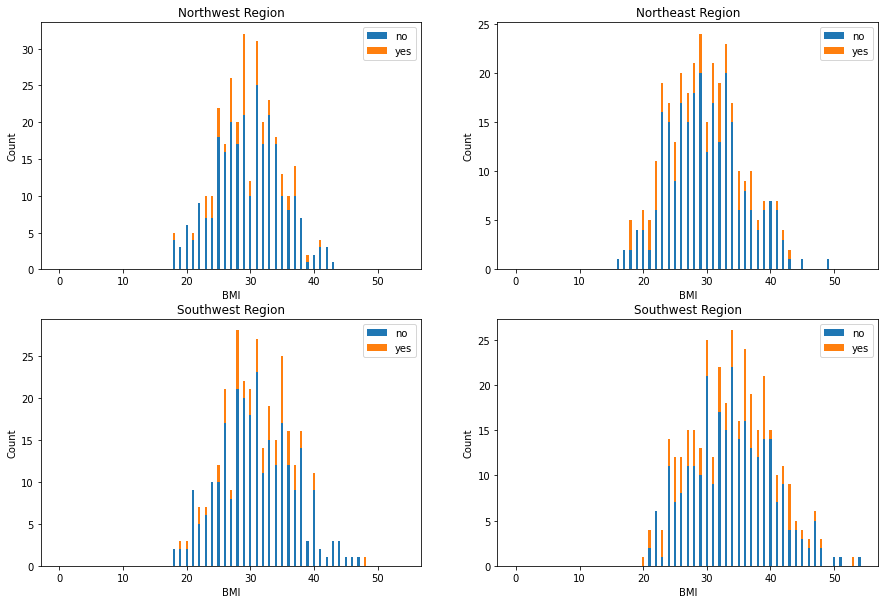

In [ ]:
# The charts below shows the relationship between "region", "smoker" and "bmi"
# draw the plot of Northwest region
bmi = pd.Series(range(55))
width = 0.35 # the width of the bars: can also be len(x) sequence
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))

ax1.bar(bmi, nwest_no, width, label='no')
ax1.bar(bmi, nwest_yes, width, bottom=nwest_no,
       label='yes')

ax1.set_ylabel('Count')
ax1.set_xlabel('BMI')
ax1.set_title('Northwest Region')
ax1.legend()


# draw the plot of Northeast region
bmi = pd.Series(range(55))
width = 0.35 # the width of the bars: can also be len(x) sequence


ax2.bar(bmi, neast_no, width, label='no')
ax2.bar(bmi, neast_yes, width, bottom=neast_no,
       label='yes')

ax2.set_ylabel('Count')
ax2.set_xlabel('BMI')
ax2.set_title('Northeast Region')
ax2.legend()


# draw the plot of Southwest region
bmi = pd.Series(range(55))
width = 0.35 # the width of the bars: can also be len(x) sequence


ax3.bar(bmi, swest_no, width, label='no')
ax3.bar(bmi, swest_yes, width, bottom=swest_no,
       label='yes')

ax3.set_ylabel('Count')
ax3.set_xlabel('BMI')
ax3.set_title('Southwest Region')
ax3.legend()


# draw the plot of Southeast region
bmi = pd.Series(range(55))
width = 0.35 # the width of the bars: can also be len(x) sequence


ax4.bar(bmi, seast_no, width, label='no')
ax4.bar(bmi, seast_yes, width, bottom=seast_no,
       label='yes')

ax4.set_ylabel('Count')
ax4.set_xlabel('BMI')
ax4.set_title('Southwest Region')
ax4.legend()

# There is no big difference between regions in bmi and smoker relationships 

# Data Preprocessing

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age            AxesSubplot(0.125,0.536818;0.352273x0.343182)
bmi         AxesSubplot(0.547727,0.536818;0.352273x0.343182)
children          AxesSubplot(0.125,0.125;0.352273x0.343182)
charges        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

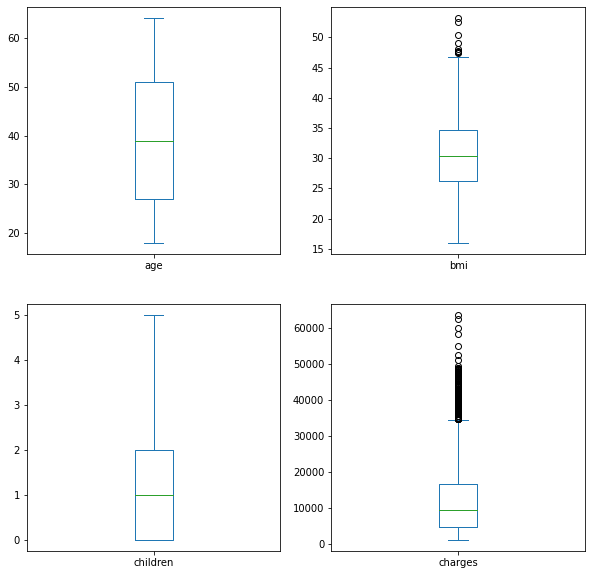

In [ ]:
data.plot(kind="box", subplots=True, layout=(2,2), figsize=(10,10))

In [ ]:
# Use one hot encoding to turn categorical data into numerical ones 
one_hot_encoded_data = pd.get_dummies(data, columns = ['sex', 'smoker', 'region'])
one_hot_encoded_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Drop the unnecessary columns
updated_data = one_hot_encoded_data.drop(columns = ['sex_male', 'smoker_no'])
updated_data.head()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


In [ ]:
# Normalize data
from sklearn import preprocessing

# Drop the columns that were categorical before one hot encoding
new_data = updated_data.drop(columns = ['sex_female', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'])
# normalize the data attributes
d = preprocessing.normalize(new_data)
scaled_df = pd.DataFrame(d, columns=new_data.columns)

# add categorical data columns
scaled_df['sex_female'] = updated_data['sex_female']
scaled_df['smoker_yes'] = updated_data['smoker_yes']
scaled_df['region_northeast'] = updated_data['region_northeast']
scaled_df['region_northwest'] = updated_data['region_northwest']
scaled_df['region_southeast'] = updated_data['region_southeast']
scaled_df['region_southwest'] = updated_data['region_southwest']

In [ ]:
scaled_df.head()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.001125,0.001652,0.000000,0.999998,1,1,0,0,0,1
1,0.010429,0.019566,0.000579,0.999754,0,0,0,0,1,0
2,0.006293,0.007416,0.000674,0.999952,0,0,0,0,1,0
3,0.001501,0.001033,0.000000,0.999998,0,0,0,1,0,0
4,0.008275,0.007468,0.000000,0.999938,0,0,0,1,0,0


In [ ]:
# Calculate z-scores
from scipy import stats
z_scores = stats.zscore(scaled_df)
z_scores.head()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.312200,-0.653660,-0.726904,0.512484,1.010519,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1,1.687468,2.724497,2.399543,-2.362276,-0.989591,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
2,0.353850,0.433317,2.911234,-0.023954,-0.989591,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
3,-1.191036,-0.770503,-0.726904,0.516470,-0.989591,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
4,0.992998,0.443097,-0.726904,-0.195958,-0.989591,-0.507463,-0.565267,1.765481,-0.611324,-0.566418


In [ ]:
# Cleaning the outliers
# Convert to absolute values
abs_z_scores = np.abs(z_scores)

# Select data points with a z-scores above or below 3 to determine outliers
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Filter the dataset from outliers
final_df = scaled_df[filtered_entries]
final_df.shape

(1279, 10)

In [ ]:
final_df.head()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.001125,0.001652,0.000000,0.999998,1,1,0,0,0,1
1,0.010429,0.019566,0.000579,0.999754,0,0,0,0,1,0
2,0.006293,0.007416,0.000674,0.999952,0,0,0,0,1,0
3,0.001501,0.001033,0.000000,0.999998,0,0,0,1,0,0
4,0.008275,0.007468,0.000000,0.999938,0,0,0,1,0,0


In [ ]:
# Splitting the dataset into train and set
X = final_df.drop(columns = ["charges"])
y = final_df.iloc[:, 3]
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Models
linear_model = LinearRegression()
ridge_model = Ridge() #L2
lasso_model = Lasso() #L1
tree_model = tree.DecisionTreeRegressor()
forest_model = RandomForestRegressor()

# Training the models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
tree_model = tree_model.fit(X, y)
forest_model.fit(X_train, y_train)

# Scores of the models
print(f"Linear Model : {linear_model.score(X_train, y_train)}")
print(f"Ridge Model : {ridge_model.score(X_train, y_train)}")
print(f"Lasso Model : {lasso_model.score(X_train, y_train)}")
print(f"Desicion Tree Model : {tree_model.score(X_train, y_train)}")
print(f"Random Forest Model : {forest_model.score(X_train, y_train)}")

Linear Model : 0.9671880107252516
Ridge Model : 0.17015806991606497
Lasso Model : 0.0
Desicion Tree Model : 0.9999999697871902
Random Forest Model : 0.9995799656930907


# Metrics

In [ ]:
# Prediction values of the models
lin_pred = linear_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)

In [ ]:
pred_dict = {"Linear": lin_pred, "Ridge":ridge_pred, "Lasso": lasso_pred, 'Tree': tree_pred, 'Forest': forest_pred}

In [ ]:
# Print the score and error values for the models
for key, value in pred_dict.items():
  print("Model:", key)
  print("R2 Score:", r2_score(y_test, value))
  print('Mean Absolute Error:', mean_absolute_error(y_test, value))
  print('Mean Squared Error:', mean_squared_error(y_test, value))
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, value)))
  print()

Model: Linear
R2 Score: 0.9608989523580443
Mean Absolute Error: 6.579890119562306e-06
Mean Squared Error: 9.200213833762544e-11
Root Mean Squared Error: 9.591774514531992e-06

Model: Ridge
R2 Score: 0.1476561952935277
Mean Absolute Error: 2.8489873463747976e-05
Mean Squared Error: 2.0055077129872205e-09
Root Mean Squared Error: 4.478289531715452e-05

Model: Lasso
R2 Score: -0.00039070809696450937
Mean Absolute Error: 3.214932945485574e-05
Mean Squared Error: 2.3538521310425084e-09
Root Mean Squared Error: 4.8516514003404124e-05

Model: Tree
R2 Score: 0.9999999659810668
Mean Absolute Error: 3.1430420471129095e-09
Mean Squared Error: 8.004426445788119e-17
Root Mean Squared Error: 8.946746026231056e-09

Model: Forest
R2 Score: 0.9960232454535469
Mean Absolute Error: 9.485853360649554e-07
Mean Squared Error: 9.357036293957952e-12
Root Mean Squared Error: 3.05892731099612e-06



# Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# K-fold is used for cross validation
k_folds = KFold(n_splits = 5)
linear_scores = cross_val_score(linear_model, X_train, y_train, cv = k_folds)
ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv = k_folds)
lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv = k_folds)
tree_scores = cross_val_score(tree_model, X_train, y_train, cv = k_folds)
forest_scores = cross_val_score(forest_model, X_train, y_train, cv = k_folds)

pred_dict = {"Linear": linear_scores, "Ridge":ridge_scores, "Lasso": lasso_scores, 'Tree': tree_scores, 'Forest': forest_scores}

# Print min, max and mean values
for key, value in pred_dict.items():
  print("Model:", key)
  print("Min CV Score: ", value.min())
  print("Max CV Score: ", value.max())
  print("Average CV Score: ", value.mean())
  print()

Model: Linear
Min CV Score:  0.963146362755166
Max CV Score:  0.9693893154459676
Average CV Score:  0.9659120355971578

Model: Ridge
Min CV Score:  0.09362833479056187
Max CV Score:  0.17872233316857633
Average CV Score:  0.1535966804853233

Model: Lasso
Min CV Score:  -0.005950753302820022
Max CV Score:  -8.756825612210584e-05
Average CV Score:  -0.003237697290400865

Model: Tree
Min CV Score:  0.9874521218978823
Max CV Score:  0.9960248108777429
Average CV Score:  0.9931867576627873

Model: Forest
Min CV Score:  0.9928428891433293
Max CV Score:  0.998083009979707
Average CV Score:  0.9963373470957346



### As we can see above Random Forest model gave a better result than all of the algorithms we used. We will be proceeding with Random Forest Model in the optimization part.

# Hyper Parameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
# Print classification report 
params = [{'n_estimators' : np.arange(1,101), 
           'random_state' : [0, 5, 10, 42]}]
gs_forest = GridSearchCV(forest_model,
                      param_grid=params,
                      scoring = 'r2',
                      cv=k_folds)
gs_forest.fit(X_train, y_train)
gs_forest.best_params_

{'n_estimators': 95, 'random_state': 42}

### The model gives the best result when 'n_estimators': 95, 'random_state': 42

In [ ]:
# Optimize the model with the parameters given by GridSearch 
optimized_model = RandomForestRegressor(n_estimators = 95, random_state = 42)
optimized_model.fit(X_train, y_train)
optimized_pred = optimized_model.predict(X_test)
print('Model: Optimized Random Forest Model')
print("R2 Score:", r2_score(y_test, optimized_pred))
print('Mean Absolute Error: %.14f' % mean_absolute_error(y_test, optimized_pred))
print('Mean Squared Error: %.14f' % mean_squared_error(y_test, optimized_pred))
print('Root Mean Squared Error: %.14f' % np.sqrt(mean_squared_error(y_test, optimized_pred)))
print()

Model: Optimized Random Forest Model
R2 Score: 0.9960457850570663
Mean Absolute Error: 0.00000094452147
Mean Squared Error: 0.00000000000930
Root Mean Squared Error: 0.00000305024624



In [ ]:
optimized_forest_scores = cross_val_score(forest_model, X_train, y_train, cv = k_folds)

print('Model: Optimized Random Forest Model')
print("Min CV Score: ", optimized_forest_scores.min())
print("Max CV Score: ", optimized_forest_scores.max())
print("Average CV Score: ", optimized_forest_scores.mean())
print()

Model: Optimized Random Forest Model
Min CV Score:  0.993706669868517
Max CV Score:  0.9981220814584822
Average CV Score:  0.9962922255907932



# Model Evaluation

##### As a result with the metrics that we evaluated from the models, we proceeded with Random Forest model. We optimized our model and the resultant scores are stated above.  
##### Our optimized model has an R2 score of 0.996 which is impressive. 